In [13]:
from langgraph.graph import StateGraph, START, END

# Typed Dict

In [14]:
from typing import TypedDict

In [15]:
class SimpleTDState(TypedDict):
    a: int
    b: int
    result: int

In [16]:
def td_node(state: SimpleTDState) -> SimpleTDState:
    state['result'] = state['a'] ** state['b']
    return state

In [17]:
td_graph_builder = StateGraph(SimpleTDState)
td_graph_builder.add_node("tdnode", td_node)
td_graph_builder.add_edge(START, "tdnode")
td_graph_builder.add_edge("tdnode", END)
td_graph = td_graph_builder.compile()

In [18]:
from IPython.display import Image, display
def display_graph(graph):
    display(Image(graph.get_graph().draw_mermaid_png()))

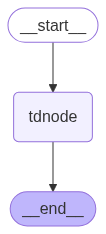

In [19]:
display_graph(td_graph)

In [20]:
td_graph.invoke(SimpleTDState(a=10,b=2, result=0))

{'a': 10, 'b': 2, 'result': 100}

In [21]:
td_graph.invoke(SimpleTDState(a="hello",b=2, result=0))

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

## Dataclasses 

In [22]:
from dataclasses import dataclass

In [ ]:
@dataclass
class SimpleDCState:
    a: int
    b: int
    result: int = 0

In [28]:
dc_graph_builder = StateGraph(SimpleDCState)

In [26]:
def dc_node(state:SimpleDCState) -> SimpleDCState:
    state.result = state.a ** state.b
    return state

In [29]:
dc_graph_builder.add_node("dcnode", dc_node)
dc_graph_builder.add_edge(START, "dcnode")
dc_graph_builder.add_edge("dcnode", END)
dc_graph = dc_graph_builder.compile()


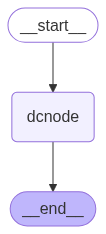

In [30]:
display_graph(dc_graph)

In [31]:
dc_graph.invoke(SimpleDCState(a=10, b=2, result=0))

{'a': 10, 'b': 2, 'result': 100}

In [32]:
dc_graph.invoke(SimpleDCState(a="hello", b=2, result=0))

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

## Pydantic

In [43]:
from pydantic import BaseModel

In [44]:
class SimplePyState(BaseModel):
    a: int
    b: int
    result: int = 0

In [45]:
pd_graph_builder = StateGraph(SimplePyState)

In [46]:
def pd_node(state: SimplePyState) -> SimplePyState:
    state.result = state.a ** state.b
    return state

In [47]:
pd_graph_builder.add_node("pdnode", pd_node)
pd_graph_builder.add_edge(START, "pdnode")
pd_graph_builder.add_edge("pdnode", END)
pd_graph = pd_graph_builder.compile()

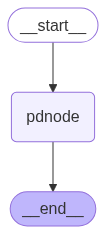

In [48]:
display_graph(pd_graph)

In [49]:
pd_graph.invoke(SimplePyState(a=10, b=2))

{'a': 10, 'b': 2, 'result': 100}

In [50]:
pd_graph.invoke(SimplePyState(a="Hello", b=2))

ValidationError: 1 validation error for SimplePyState
a
  Input should be a valid integer, unable to parse string as an integer [type=int_parsing, input_value='Hello', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/int_parsing

In [ ]:
pd_graph.invoke(SimplePyState(a="10", b=2))

{'a': 10, 'b': 2, 'result': 100}

### Built-in Specialized Types

| Validator / Type      | Summary                                                                                           |
|-----------------------|---------------------------------------------------------------------------------------------------|
| `EmailStr`            | Validates that a string is a properly formatted email address. Uses the `email-validator` package internally[2][5]. |
| `AnyUrl` / `HttpUrl`  | Validates that a string is a valid (HTTP) URL.                                                    |
| `IPvAnyAddress`       | Validates that a string is a valid IPv4 or IPv6 address.                                          |
| `IPvAnyInterface`     | Validates that a string is a valid IP interface.                                                  |
| `IPvAnyNetwork`       | Validates that a string is a valid IP network.                                                    |
| `PaymentCardNumber`   | Validates that a string is a valid payment card number (Luhn algorithm).                          |
| `UUID1`, `UUID3`, `UUID4`, `UUID5` | Validates that a string is a valid UUID of the respective version.                    |
| `Decimal`, `condecimal` | Ensures a value is a decimal, with optional constraints (e.g., max_digits, decimal_places).     |
| `conint`, `confloat`, `constr` | Constrained versions of int, float, and str (e.g., min/max values, length, regex).        |
| `SecretStr`, `SecretBytes` | For storing sensitive data, hides value in representation.                                   |
| `PastDate`, `FutureDate` | Validates that a date is in the past or future.                                                |



In [52]:
%pip install pydantic[email]

  Using cached email_validator-2.2.0-py3-none-any.whl.metadata (25 kB)
  Using cached dnspython-2.7.0-py3-none-any.whl.metadata (5.8 kB)
Using cached email_validator-2.2.0-py3-none-any.whl (33 kB)
Using cached dnspython-2.7.0-py3-none-any.whl (313 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
from pydantic import EmailStr, AnyUrl, Field, field_validator
class BusinessState(BaseModel):
    name: str = Field(...,min_length=5)
    email: EmailStr
    mobile: str = Field(min_length=10, default="+919515151992")
    website: AnyUrl
    # valid category is education, sports
    category: str = Field(default='education',min_length=1)

    @field_validator("category")
    def is_valid_category(cls, value):
        if value.lower() not in ["education", "sports"]:
            raise ValueError("Invalid category, as of now only education and sports are valid")
        return value

In [83]:
def node(state: BusinessState) -> BusinessState:
    return state

In [84]:
business_graph_builder = StateGraph(BusinessState)
business_graph_builder.add_node("test", node)
business_graph_builder.add_edge(START, "test")
business_graph_builder.add_edge("test", END)
business_graph = business_graph_builder.compile()

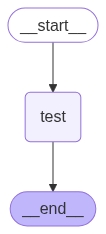

In [85]:
display_graph(business_graph)

In [86]:
valid_state = BusinessState(
    name="qualitythought",
    email="info@qualitythought.in",
    website="https://qualitythought.in",
    category="education"

)
business_graph.invoke(valid_state)

{'name': 'qualitythought',
 'email': 'info@qualitythought.in',
 'mobile': '+919515151992',
 'website': AnyUrl('https://qualitythought.in/'),
 'category': 'education'}

In [87]:
invalid_state = BusinessState(
    name="qualitythoughtresorts",
    email="info@qualitythought.in",
    website="https://qualitythought.in",
    category="hospitality"
)
business_graph.invoke(invalid_state)

ValidationError: 1 validation error for BusinessState
category
  Value error, Invalid category, as of now only education and sports are valid [type=value_error, input_value='hospitality', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error